# Reductions

Dependencies for this notebook: `graphviz` executable installed on the system and on the path, [networkx](https://anaconda.org/anaconda/networkx), [graphviz python](https://anaconda.org/conda-forge/python-graphviz) and [pydotplus](https://anaconda.org/conda-forge/pydotplus) Anaconda packages. (See [here](https://graphviz.readthedocs.io/en/stable/index.html) for the documentation of the graphviz package.)


In [ ]:
%%html
<style>
.rise-enabled .cell .input_prompt {
    display: none;
}
</style>


_Useful unicode symbols:_ φ   ∨   ∧   ¬   ≠    Ψ

### Utility code (skip reading but run this first)

In [ ]:
#%run "Utilities.ipynb"
from IPython.display import clear_output
clear_output()

In [ ]:
import graphviz
from graphviz import Graph
from graphviz import Digraph

In [ ]:
import networkx as nx

import pydotplus

import pygraphviz as pgv

def nxgraph(G):
    #P = pydotplus.graph_from_dot_data(G.source)
    #return nx.drawing.nx_pydot.from_pydot(P)
    P= pgv.AGraph(G.source)
    return nx.Graph(P)


In [ ]:
def subscriptdigit(d):
    return ["₀","₁","₂","₃","₄","₅","₆","₇","₈","₉"][d]

def subscript(s):
    digits = ["0","1","2","3","4","5","6","7","8","9"]
    return "".join([subscriptdigit(int(s[i])) if s[i] in digits else s[i] for i in range(len(s))])

In [ ]:
def scale(G,sizeparam="10,5"):
    G.graph_attr.update(size=sizeparam, ratio="fill")
    return G

## 3SAT $\leq_p$ ISET

In [ ]:
φ = "(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )  "

In [ ]:
# Evaluate 3CNF φ on assignment x 
# Both are represented as strings
def evalcnf(φ,x):

    def varval(v):
        return (1-int(x[int(v[2:])])  if v[0]=="¬" else int(x[int(v[1:])]))
    
    for (v0,v1,v2) in getclauses(φ):
        # print(c+str([varval(v0),varval(v1),varval(v2)]))
        if not varval(v0)+varval(v1)+varval(v2): return False
    
    return True

# Clause list of a 3CNF φ
def getclauses(φ):
    clauses =  φ.split("∧")
    res = []
    for c in clauses:
        (v0,_,v1,_,v2) = c.strip()[1:-1].split()
        res.append((v0.strip(),v1.strip(),v2.strip()))
    return res
    

# number of variables of a formula φ
def numvars(φ):
    for n in range(len(φ)-1,0,-1):
        if φ.find('x'+str(n))>= 0: return n+1
    raise Exception


In [ ]:
numvars(φ)

In [ ]:
evalcnf(φ,"0101")

In [ ]:
print(φ)

__Question:__ Is φ satisfiable?

In [ ]:
evalcnf(φ,"1000")

## Some bigger instances (DIMACS format)

In [ ]:
def from_dimacs(cnf):
    φ = ""
    m = 0
    n = 0
    def var(idx): return f"x{int(idx)-1}" if int(idx)>0 else f"¬x{-int(idx)-1}"
    
    for line in cnf.split("\n"):
        if not line.strip() or line[0]=="c" or line[0]=="%" or line[0]=="0": continue
        if line[0]=="p":
            _,t,n_,m_ = line.split()
            if t!="cnf": raise Exception("Only handle CNF!")
            n = int(n_)
            m = int(m_)
            continue
        a,b,c,_ = line.split()
        if _ != "0": raise Exception("Only handle 3CNF!")
        φ += f"({var(a)} ∨ {var(b)} ∨ {var(c)} ) ∧ "
    φ = φ[:-3]
    return φ
        
            

In [ ]:
def from_dimacs_assign(assign):
    avals = {}
    n = 0
    for a in assign.split():
        if a == "v": continue
        a = int(a)
        if a>0:
            avals[a-1] = "1"
            n = max(n,a)
        if a<0:
            avals[-a-1] = "0"
            n = max(n,-a)
        if a == 0:
            break
    x = ""
    for i in range(n):
        x += avals[i]
    return x

In [ ]:
# from https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html
cnf = r'''
c This Formular is generated by mcnf
c
c    horn? no 
c    forced? no 
c    mixed sat? no 
c    clause length = 3 
c
p cnf 20  91 
 4 -18 19 0
3 18 -5 0
-5 -8 -15 0
-20 7 -16 0
10 -13 -7 0
-12 -9 17 0
17 19 5 0
-16 9 15 0
11 -5 -14 0
18 -10 13 0
-3 11 12 0
-6 -17 -8 0
-18 14 1 0
-19 -15 10 0
12 18 -19 0
-8 4 7 0
-8 -9 4 0
7 17 -15 0
12 -7 -14 0
-10 -11 8 0
2 -15 -11 0
9 6 1 0
-11 20 -17 0
9 -15 13 0
12 -7 -17 0
-18 -2 20 0
20 12 4 0
19 11 14 0
-16 18 -4 0
-1 -17 -19 0
-13 15 10 0
-12 -14 -13 0
12 -14 -7 0
-7 16 10 0
6 10 7 0
20 14 -16 0
-19 17 11 0
-7 1 -20 0
-5 12 15 0
-4 -9 -13 0
12 -11 -7 0
-5 19 -8 0
1 16 17 0
20 -14 -15 0
13 -4 10 0
14 7 10 0
-5 9 20 0
10 1 -19 0
-16 -15 -1 0
16 3 -11 0
-15 -10 4 0
4 -15 -3 0
-10 -16 11 0
-8 12 -5 0
14 -6 12 0
1 6 11 0
-13 -5 -1 0
-7 -2 12 0
1 -20 19 0
-2 -13 -8 0
15 18 4 0
-11 14 9 0
-6 -15 -2 0
5 -12 -15 0
-6 17 5 0
-13 5 -19 0
20 -1 14 0
9 -17 15 0
-5 19 -18 0
-12 8 -10 0
-18 14 -4 0
15 -9 13 0
9 -5 -1 0
10 -19 -14 0
20 9 4 0
-9 -2 19 0
-5 13 -17 0
2 -10 -18 0
-18 3 11 0
7 -9 17 0
-15 -6 -3 0
-2 3 -13 0
12 3 -2 0
-2 -3 17 0
20 -15 -16 0
-5 -17 -19 0
-20 -18 11 0
-9 1 -5 0
-19 9 17 0
12 -2 17 0
4 -16 -5 0
%
0
'''

cnfsat = "v 1 -2 -3 -4 -5 6 -7 -8 -9 -10 -11 -12 13 14 15 -16 17 -18 -19 20 0"

In [ ]:
Ψ = from_dimacs(cnf)
Ψ

In [69]:
print(φ)

(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)


In [70]:
print(Ψ)

(x3 ∨ ¬x17 ∨ x18 ) ∧ (x2 ∨ x17 ∨ ¬x4 ) ∧ (¬x4 ∨ ¬x7 ∨ ¬x14 ) ∧ (¬x19 ∨ x6 ∨ ¬x15 ) ∧ (x9 ∨ ¬x12 ∨ ¬x6 ) ∧ (¬x11 ∨ ¬x8 ∨ x16 ) ∧ (x16 ∨ x18 ∨ x4 ) ∧ (¬x15 ∨ x8 ∨ x14 ) ∧ (x10 ∨ ¬x4 ∨ ¬x13 ) ∧ (x17 ∨ ¬x9 ∨ x12 ) ∧ (¬x2 ∨ x10 ∨ x11 ) ∧ (¬x5 ∨ ¬x16 ∨ ¬x7 ) ∧ (¬x17 ∨ x13 ∨ x0 ) ∧ (¬x18 ∨ ¬x14 ∨ x9 ) ∧ (x11 ∨ x17 ∨ ¬x18 ) ∧ (¬x7 ∨ x3 ∨ x6 ) ∧ (¬x7 ∨ ¬x8 ∨ x3 ) ∧ (x6 ∨ x16 ∨ ¬x14 ) ∧ (x11 ∨ ¬x6 ∨ ¬x13 ) ∧ (¬x9 ∨ ¬x10 ∨ x7 ) ∧ (x1 ∨ ¬x14 ∨ ¬x10 ) ∧ (x8 ∨ x5 ∨ x0 ) ∧ (¬x10 ∨ x19 ∨ ¬x16 ) ∧ (x8 ∨ ¬x14 ∨ x12 ) ∧ (x11 ∨ ¬x6 ∨ ¬x16 ) ∧ (¬x17 ∨ ¬x1 ∨ x19 ) ∧ (x19 ∨ x11 ∨ x3 ) ∧ (x18 ∨ x10 ∨ x13 ) ∧ (¬x15 ∨ x17 ∨ ¬x3 ) ∧ (¬x0 ∨ ¬x16 ∨ ¬x18 ) ∧ (¬x12 ∨ x14 ∨ x9 ) ∧ (¬x11 ∨ ¬x13 ∨ ¬x12 ) ∧ (x11 ∨ ¬x13 ∨ ¬x6 ) ∧ (¬x6 ∨ x15 ∨ x9 ) ∧ (x5 ∨ x9 ∨ x6 ) ∧ (x19 ∨ x13 ∨ ¬x15 ) ∧ (¬x18 ∨ x16 ∨ x10 ) ∧ (¬x6 ∨ x0 ∨ ¬x19 ) ∧ (¬x4 ∨ x11 ∨ x14 ) ∧ (¬x3 ∨ ¬x8 ∨ ¬x12 ) ∧ (x11 ∨ ¬x10 ∨ ¬x6 ) ∧ (¬x4 ∨ x18 ∨ ¬x7 ) ∧ (x0 ∨ x15 ∨ x16 ) ∧ (x19 ∨ ¬x13 ∨ ¬x14 ) ∧ (x12 ∨ ¬x3 ∨ x9 ) ∧ (x13 ∨ x6 ∨ x9 ) ∧ (¬x4 ∨ x8 ∨ x19 ) ∧ (x9 ∨

In [71]:
numvars(Ψ)

20

In [ ]:
assign = from_dimacs_assign(cnfsat)
assign

In [72]:
x_0 = '10000100000011101001'
x_1 = '11000100000011101001'
evalcnf(Ψ,x_0), evalcnf(Ψ,x_1) 

(True, False)

In [ ]:
evalcnf(Ψ,"10000100110011101001")

In [ ]:
from collections import defaultdict

In [73]:
# Reduction SAT to Independent Set
def SAT2IS_(φ):
    n = numvars(φ) 
    G = Graph() 
    nodes =  defaultdict(list)
    def n(c,v): return f"{c}_{v}"

    for c,C in enumerate(getclauses(φ)):
        for u in C:
            # add vertex c_u to the graph and list nodes[u]
            G.node(vtx := n(c,u),f"{c}:{subscript(u)}")
            nodes[u].append(vtx ) 
           
            # connect red edge to all vertices c'_neg(u)
            neg_u = u[1:] if u[0]=="¬" else "¬"+u
            for v in nodes[neg_u]: G.edge(vtx,v,color="red") 
            
        # add triangle ("green") edges
        G.edge(n(c,C[0]), n(c,C[1]),color="green")
        G.edge(n(c,C[1]), n(c,C[2]),color="green")
        G.edge(n(c,C[2]), n(c,C[0]),color="green")
    return G

In [74]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3) ∧ (¬x1 ∨ x0 ∨ x2)"
# How many vertices , green, and red edges will SAT2IS_(φ) have?

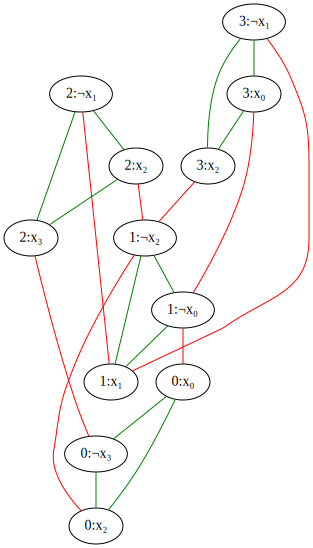

In [75]:
SAT2IS_(φ)

In [ ]:
# same reduction but taking care of colors and keeping track what happens to an assignment
def SAT2IS(φ,x=""):
    S = []
#    G.node(u,style='filled',fillcolor=('red' if x and x[i]=="0" else 'green'))
        
    n = numvars(φ) 
    G =Graph() # (engine='neato')
    
    def nname(c,v): return f"({c},{v})"
    
    c = 0
    nodes = {}
    for i in range(n):
        nodes["x"+str(i)] = []
        nodes["¬x"+str(i)] = []
    
    for C in getclauses(φ):
        sat = False
        for u in C: 
            if x and (not sat) and (((u[0]=="¬") and (x[int(u[2:])]=="0")) or ((u[0]!="¬") and (x[int(u[1:])]=="1"))):
                G.node(nname(c,u),f"{c}:{subscript(u)}",fontsize="10",style='filled',fillcolor='lightblue')
                S.append(nname(c,u))
                sat = True
            else:
                G.node(nname(c,u),f"{c}:{subscript(u)}",fontsize="10")
            negu = u[1:] if u[0]=="¬" else "¬"+u
            for v in nodes[negu]: G.edge(nname(c,u),v,color="red") 
            nodes[u].append(nname(c,u))
        G.edge(nname(c,C[0]), nname(c,C[1]),color="green")
        G.edge(nname(c,C[1]), nname(c,C[2]),color="green")
        G.edge(nname(c,C[0]), nname(c,C[2]),color="green")
        c += 1
    
    return (scale(G) if not x else (scale(G),S))

True


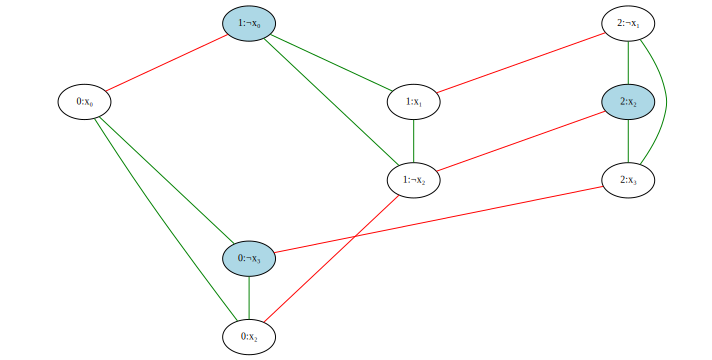

In [76]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
print(evalcnf(φ,"0110"))
(G,S) = SAT2IS(φ,"0110")
G

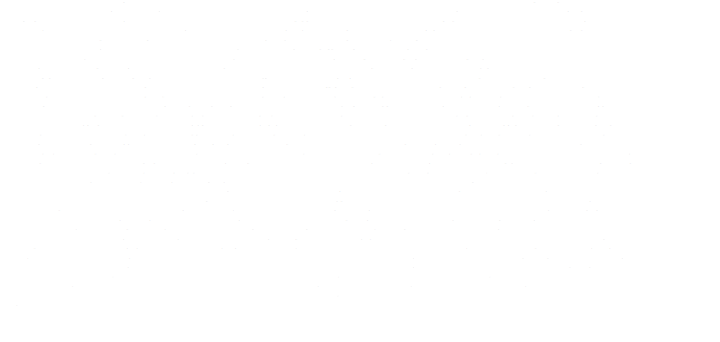

In [77]:
SAT2IS(Ψ)

In [ ]:
SAT2IS(Ψ,assign)[0]

## Proof by program

In [78]:
def recoverassignment(G,S,n):
    """Transform independent set S for G into a satisfying assignment for original formula"""
    x = [0]*n
    for i in range(n):
        for v in S: 
            if v.find(f",x{i}")>=0: x[i]=1
    return x

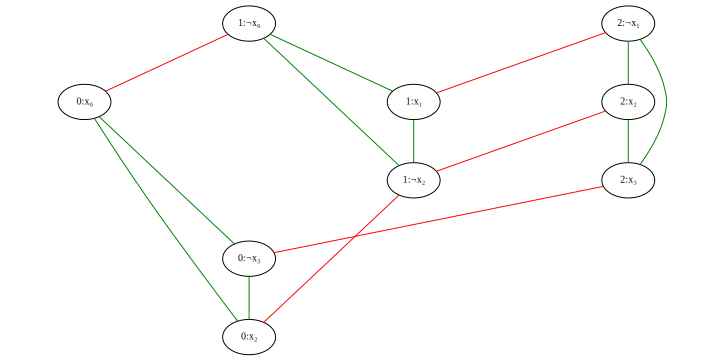

In [79]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
G = SAT2IS(φ)
G

In [80]:
recoverassignment(G,['(0,¬x3)', '(1,¬x0)', '(2,x2)'],4)

[0, 0, 1, 0]

## Independent Set to Maximum Cut

In [ ]:
# Reduction IS to MAXCUT
def IS2MAXCUT_(G):
    G =nxgraph(G)
    H =Graph()
    s ="source"
    H.node(s) # create source node
    
    for v in G.nodes(): 
        H.node(v,shape="square")
        H.edge(s,v)
    
    for j,(u,v) in enumerate(G.edges()):
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        H.node(g1,label=u+"-"+v)
        H.node(g2,label=u+"-"+v)
        H.edges([(s,g1),(s,g2),(g1,g2),(u,g1),(v,g2)]) 
        
    
    return H

In [ ]:
G = Graph()
G.edge("a","b")
G.edge("b","c")
G

In [ ]:
IS2MAXCUT_(G)

In [ ]:
G = IS2MAXCUT_(SAT2IS(φ))
G.graph_attr.update(size="11,5", ratio="fill")
G

In [ ]:
# same reduction as above but handling colors and showing the resulting cut when the original graph has independent set
def IS2MAXCUT(G,I=[]):
    G =nxgraph(G)
    S = []
    H =Graph()# engine='sfdp')
    H.node("source",style='filled',fillcolor='blue')
    S.append("source")
    for v in G.nodes():
        color = ('red' if I and v in I else 'lightblue')
        H.node(v,label=subscript(v),fontsize="10",style='filled',fillcolor=color, shape="square")
        ecol = 'black'
        pwidth = '1'
        if I and v in I: 
            S.append(v)
            ecol = 'red'
            pwidth = '2'
        H.edge("source",v,color=ecol,penwidth=pwidth)  # len="2"
    
    j =0
    for (u,v) in G.edges():
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        c1 = 'lightgreen'
        c2 = 'lightgreen'
        if I and (not u in I):
            c1 = 'red'
            S.append(g1)
        if I and (not v in I):
            c2 = 'red'
            S.append(g2)
        gadget = Graph("gadget"+str(j))
        gadget.node(g1,subscript("e0"),fontsize="10",style='filled',fillcolor=c1)
        gadget.node(g2,subscript("e1"),fontsize="10",style='filled',fillcolor=c2)
        gadget.edge(g1,g2,color=('red' if (g1 in S) != (g2 in I) else 'black'), penwidth=('4' if (g1 in S) != (g2 in I) else '1')) # len="1"
        gadget.edge(u,g1, color=('red' if (g1 in S) != (u in I) else 'black'),penwidth =('4' if (g1 in S) != (u in S) else '1')  ) # len="1"
        gadget.edge(v,g2, color=('red' if (g2 in S) != (v in I) else 'black'),penwidth= ('4' if (g2 in S) != (v in S) else '1') ) # len="1"
        
        H.subgraph(gadget)
        H.edge(g1,"source",color=('red' if (g1 in S)  else 'black'),penwidth=('4' if (g1 in S)  else '1')) # len="2.5"
        H.edge(g2,"source",color=('red' if (g2 in S)  else 'black'),penwidth= ('4' if (g2 in S)  else '1') )
        j +=1
        
    
    return (scale(H),S) if I else scale(H)

In [ ]:
IS2MAXCUT(*SAT2IS(φ,"1000"))[0]
#IS2MAXCUT(SAT2IS(φ))

Some big graphs

In [ ]:
IS2MAXCUT(SAT2IS(Ψ))

In [ ]:
IS2MAXCUT(*SAT2IS(Ψ,assign))[0]